In [31]:
#download dataset
import pandas as pd
import numpy as np
import urllib.request
import tarfile
from pathlib import Path

def loadHousingdata():
    tarballPath = Path("datasets/housing.tgz")
    if not tarballPath.is_file():
        Path("datasets").mkdir(parents=True,exist_ok=True)
        datasetURL = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(datasetURL, "housing.tgz")
        with tarfile.open("housing.tgz") as housing_tarball:
            housing_tarball.extractall(path = "datasets")
        
        return pd.read_csv(Path("datasets/housing/housing.csv"))
    


In [32]:
housing = loadHousingdata()

C:\Users\pkmis\AppData\Local\Temp\ipykernel_13808\3340875664.py:15: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path = "datasets")


In [33]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [34]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


*Conclusion*

- **total_bedrooms** has only 20433 non nulll values ie. 207 are missing
- **ocean_proximit** only object attribute. some values are repetitive. it should be a categorical value

In [35]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [36]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


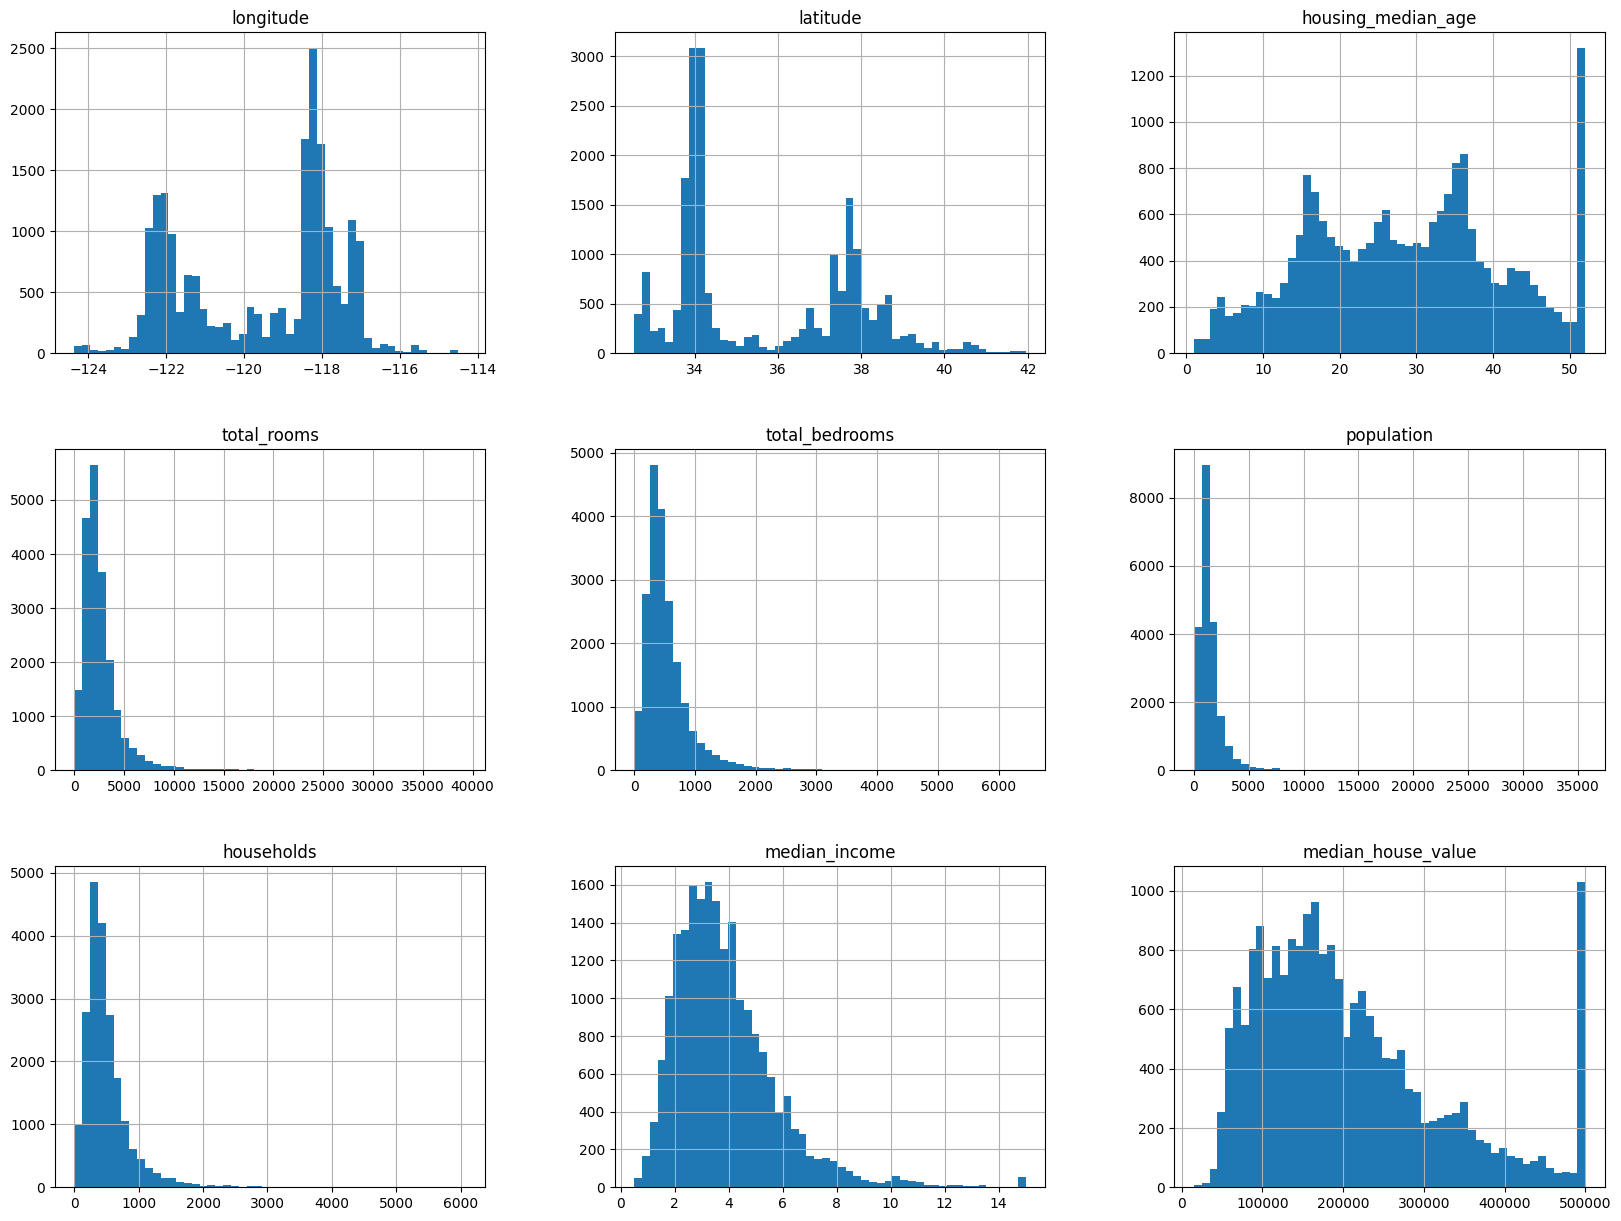

In [37]:
#plot histogram for each numerical values to see the distribution
"""A histogram shows number of instance on y-axis and value range on x-axis"""

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

#### Create Test set
Creating a test set before you start any model training or analysis is essential for obtaining an unbiased and realistic evaluation of your model's performance. It helps you prevent overfitting, avoid data snooping bias, and establish a reliable benchmark for comparing different models.

In [38]:
# create test set and train set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


Now requirement is median income is very importatn to predict median hosuing price.
after watchign the histogram of median income, lets label the categories into five categories

- 1 - 0 to 1.5 (less than $15k)
- 2 - 1.5 to 3 
- 3 - 3 to 4.5
- 4 - 4.5 to 6
- 5 - 6 and more


In [39]:
housing["income_cat"] = pd.cut(housing["median_income"] , bins = [0., 1.5,3,4.5, 5, np.inf], labels=[1,2,3,4,5])

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


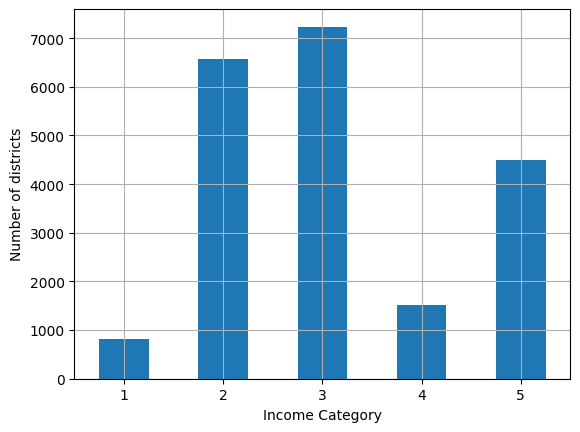

In [40]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

Having multiple splits can be useful if you want to better estimate the performance of our model.

In [41]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])

In [42]:
print(len(strat_train_set), "train +", len(strat_test_set), "test")

16512 train + 4128 test


In [43]:
#income category proportion in test set
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
5    0.217539
4    0.073159
1    0.039971
Name: count, dtype: float64

In [44]:
#income category proportion in full dataset
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
5    0.217490
4    0.073256
1    0.039826
Name: count, dtype: float64

we will not use income category column again, so lets drop and get back the original data

In [45]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Explore and Visualise the data

In [46]:
# make a copy of training dataset
housing = strat_train_set.copy()

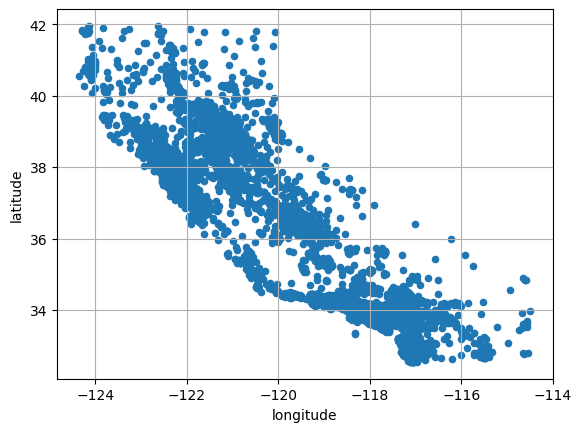

In [47]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid = True)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

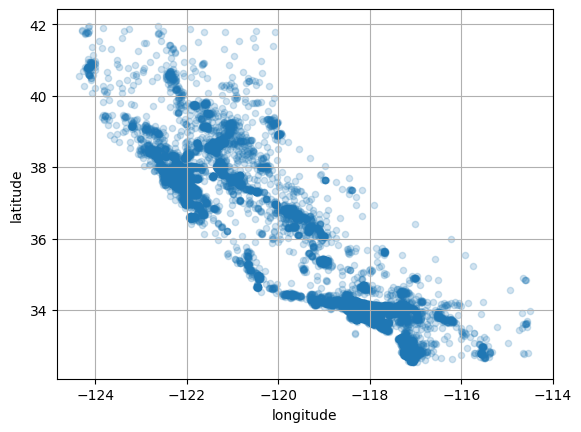

In [48]:
#make alpha=0.2 to see the density of data points
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, grid = True)

<Axes: xlabel='longitude', ylabel='latitude'>

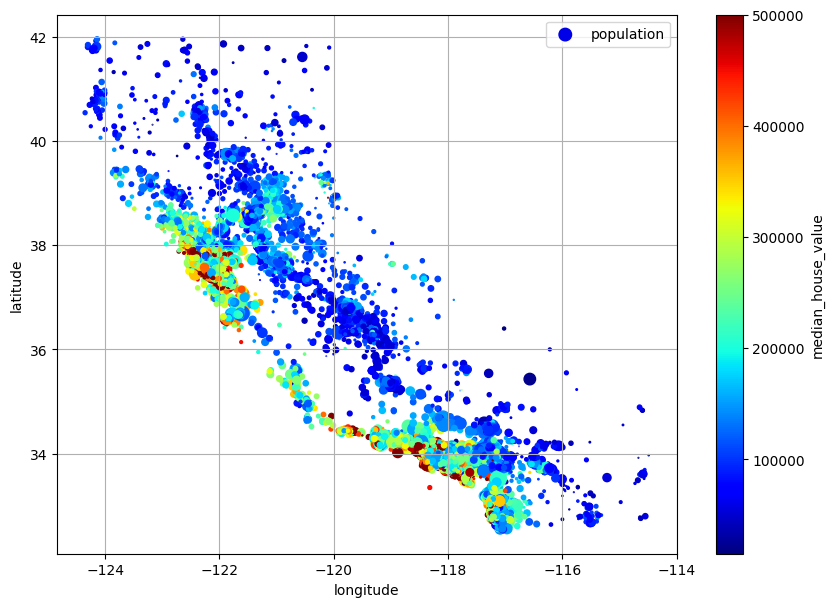

In [49]:
#here radius of circle represents population and color represents price
housing.plot(kind="scatter", x="longitude", y="latitude", s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap="jet", colorbar=True, grid = True)

here we can see that the houses which are near sea(close to ocean ) has high price (because of sea facing).

Clustering algo should be useful for detecting the main cluster and for adding new feature that measure the proximity to the cluster centers.

### Look for correlation

In [50]:
#correlation matrix
corr_matrix = housing.corr(numeric_only=True)

In [51]:
corr_matrix['median_house_value'].sort_values(ascending=False)  #correlation of each attribute with median house value

median_house_value    1.000000
median_income         0.691701
total_rooms           0.138372
housing_median_age    0.108138
households            0.070919
total_bedrooms        0.053885
population           -0.019877
longitude            -0.050177
latitude             -0.140510
Name: median_house_value, dtype: float64

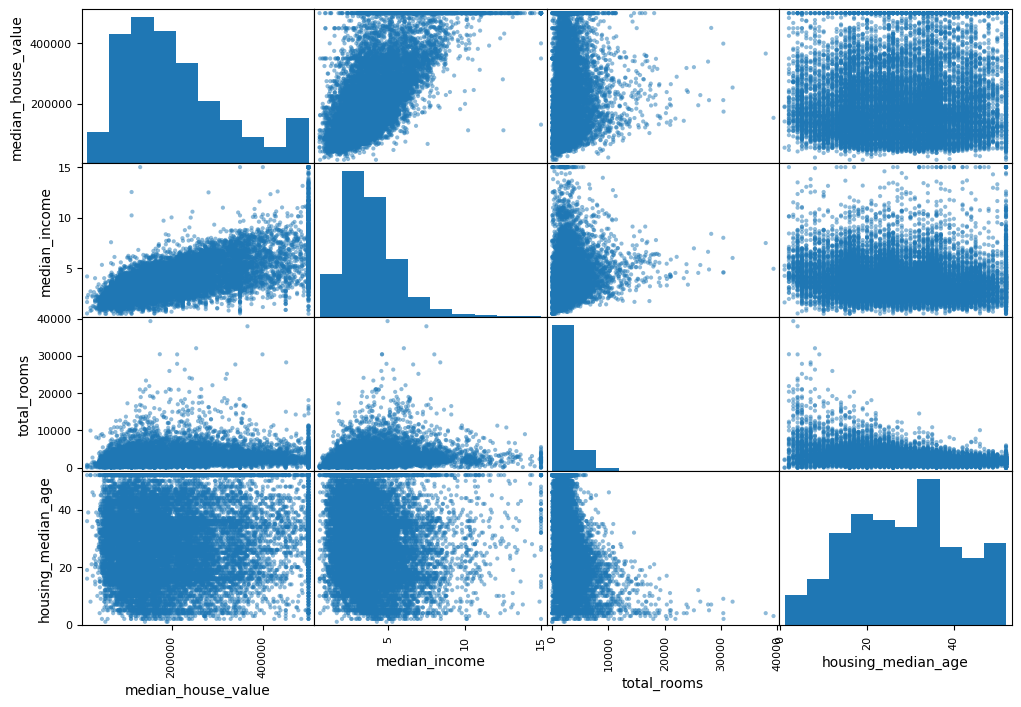

In [52]:
#plot correlation
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()


After loooking the scatter matrix its clear that meadian income is the most promising attribute to predict median house value so lets zoom it

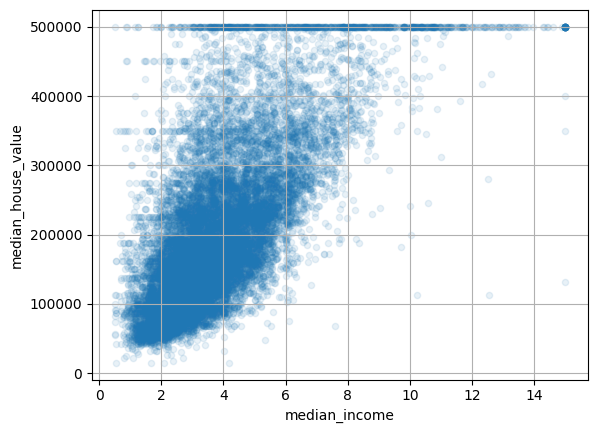

In [53]:
housing.plot(kind="scatter", x = "median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

Conclusion

1. Correlation is strong - upward trend.
2. Price cap is clearly visbile as horizontal line at $50k, one at $45k, $35k and one probably $28k.


we can remove the corresponding districts to prevent the algo from learning to reproduce these data quirks

#### Explore more attributes before preparing data for ML

1. No. of Rooms per household
2. Number of rooms
3. Population per household

In [54]:
housing["rooms_per_house"] = housing["total_rooms"]/housing["households"]

In [55]:
housing["bedrooms_ratio"] = housing['total_bedrooms']/housing['total_rooms']
housing["people_per_house"] = housing["population"]/housing["households"]

In [56]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
20217,-121.26,37.95,44.0,819.0,184.0,677.0,183.0,1.7250,59300.0,INLAND,4.475410,0.224664,3.699454
17424,-117.17,32.80,20.0,2827.0,554.0,1822.0,536.0,3.4706,157600.0,NEAR OCEAN,5.274254,0.195967,3.399254
7308,-118.16,34.03,45.0,894.0,231.0,925.0,222.0,2.6042,145000.0,<1H OCEAN,4.027027,0.258389,4.166667
12266,-118.45,34.03,41.0,1240.0,320.0,711.0,304.0,3.3482,318100.0,<1H OCEAN,4.078947,0.258065,2.338816
2244,-122.25,38.10,52.0,1591.0,372.0,817.0,357.0,2.1411,97200.0,NEAR BAY,4.456583,0.233815,2.288515


In [57]:
#again look correlation matrix
corr_matrix = housing.corr(numeric_only=True)

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691701
rooms_per_house       0.147745
total_rooms           0.138372
housing_median_age    0.108138
households            0.070919
total_bedrooms        0.053885
population           -0.019877
people_per_house     -0.033123
longitude            -0.050177
latitude             -0.140510
bedrooms_ratio       -0.262690
Name: median_house_value, dtype: float64

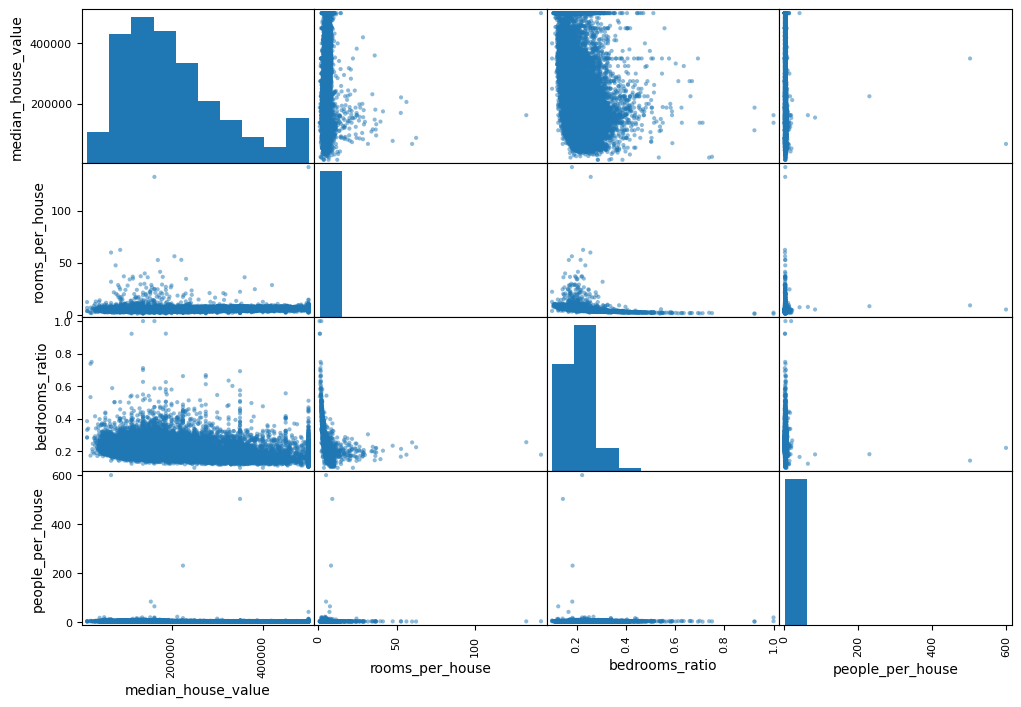

In [58]:
#plot this matrix
attributes = ["median_house_value", "rooms_per_house", "bedrooms_ratio", "people_per_house"]
scatter_matrix(housing[attributes], figsize=(12,8))

plt.show()

# Prepare data for Algo

Before cleaning the data first copy the strat_train_set and remove the target variable from it. 

this will help in separating the target value for cleaning

In [59]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy() 

### CLean the data

In [67]:
#Fix the missing values
housing['total_bedrooms'].isnull().sum()

np.int64(174)

to complete the missing values: 
1. get rid of entire row -- dropna()
2. get rid of whole attribute -- drop()
3. set msising values to some value -- fillna()

In [72]:
#lets use option 3 to fill missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")  #median is used because it is robust to outliers


In [75]:
#since median can only be computed on numerical values, we need to only select numerical values

housing_numerical = housing.select_dtypes(include=[np.number]).columns
housing_numerical

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [76]:

# fit the imputer
imputer.fit(housing[housing_numerical])

SimpleImputer(strategy='median')

In [80]:
# compare the imputer's median values with the actual median values

print(imputer.statistics_)
print(housing[housing_numerical].median().values)

[-118.51     34.26     29.     2125.5     433.     1166.      408.
    3.5385]
[-118.51     34.26     29.     2125.5     433.     1166.      408.
    3.5385]


In [82]:
# now lets transform and use the median to fill the missing value and save in X
X = imputer.transform(housing[housing_numerical])
X

array([[-1.21260e+02,  3.79500e+01,  4.40000e+01, ...,  6.77000e+02,
         1.83000e+02,  1.72500e+00],
       [-1.17170e+02,  3.28000e+01,  2.00000e+01, ...,  1.82200e+03,
         5.36000e+02,  3.47060e+00],
       [-1.18160e+02,  3.40300e+01,  4.50000e+01, ...,  9.25000e+02,
         2.22000e+02,  2.60420e+00],
       ...,
       [-1.22110e+02,  3.73700e+01,  2.20000e+01, ...,  5.20000e+02,
         1.87000e+02,  1.03329e+01],
       [-1.15620e+02,  3.30400e+01,  1.70000e+01, ...,  7.45000e+02,
         2.17000e+02,  2.04630e+00],
       [-1.22840e+02,  3.84200e+01,  2.90000e+01, ...,  1.38100e+03,
         5.31000e+02,  2.96250e+00]], shape=(16512, 8))

In [85]:
#convert X into dataframe
housing_tr = pd.DataFrame(X, columns=housing_numerical, index=housing.index)

housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20217,-121.26,37.95,44.0,819.0,184.0,677.0,183.0,1.7250
17424,-117.17,32.80,20.0,2827.0,554.0,1822.0,536.0,3.4706
7308,-118.16,34.03,45.0,894.0,231.0,925.0,222.0,2.6042
12266,-118.45,34.03,41.0,1240.0,320.0,711.0,304.0,3.3482
2244,-122.25,38.10,52.0,1591.0,372.0,817.0,357.0,2.1411


In [86]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 20217 to 15851
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


In [87]:
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

##### Handle Categorical values 

In [88]:
housing_categorical = housing[['ocean_proximity']]
housing_categorical.head()

,ocean_proximity
20217,INLAND
17424,NEAR OCEAN
7308,<1H OCEAN
12266,<1H OCEAN
2244,NEAR BAY


In [89]:
# to convert into numerical we will use Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_categorical)

In [96]:
#get unique encoded value
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [97]:
#apply one hot
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_categorical)

In [98]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [99]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], shape=(16512, 5))

In [100]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]